In [1]:
import cv2
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from sklearn.model_selection import train_test_split
from sklearn import svm
import timeit

In [2]:
dir = 'C:\\Users\\THEHAD\\Desktop\\SVMPROJECT\\Test'
categories = ['Male' , 'Female']
data = []

In [6]:
for category in categories:
    path = os.path.join(dir, category)
    label = categories.index(category)

    for img in os.listdir(path):
        imgpath = os.path.join(path, img)
        pet_img = cv2.imread(imgpath, 0)
        try:
            pet_img = cv2.resize(pet_img, (50, 50))
            image = np.array(pet_img).flatten()
            data.append([image, label])
        except Exception as e:
            pass

In [4]:
data

[[array([254, 254, 254, ...,  31,  32,  31], dtype=uint8), 0],
 [array([174, 160, 185, ...,  60,  92, 118], dtype=uint8), 0],
 [array([ 60,  78, 240, ...,  16,  15,  16], dtype=uint8), 0],
 [array([15, 15, 25, ...,  3,  3,  3], dtype=uint8), 0],
 [array([251, 251, 250, ...,  55,  59,  69], dtype=uint8), 0],
 [array([249, 245, 244, ...,  30,  29,  29], dtype=uint8), 0],
 [array([0, 0, 1, ..., 6, 4, 1], dtype=uint8), 0],
 [array([204, 198, 207, ..., 211, 211, 211], dtype=uint8), 0],
 [array([237, 237, 237, ...,  50,  51,  50], dtype=uint8), 0],
 [array([164, 167, 164, ...,  88,  84,  78], dtype=uint8), 0],
 [array([218, 218, 217, ...,  40,  38,  39], dtype=uint8), 0],
 [array([161, 174, 202, ..., 144, 151, 132], dtype=uint8), 0],
 [array([173, 174, 176, ..., 190, 188, 188], dtype=uint8), 0],
 [array([ 10,  10,  10, ..., 199, 195, 192], dtype=uint8), 0],
 [array([255, 255, 255, ...,  63,  63,  63], dtype=uint8), 0],
 [array([79, 79, 77, ..., 27, 27, 25], dtype=uint8), 0],
 [array([110, 11

In [8]:
lenofdata= len(data)
print(lenofdata)

40002


In [9]:
X=[]
y=[]

In [11]:
for categories, label in data:
    X.append(categories)
    y.append(label)


In [14]:
X= np.array(X).reshape(lenofdata,-1)
y=np.array(y)


In [16]:
X

array([[254, 254, 254, ...,  31,  32,  31],
       [174, 160, 185, ...,  60,  92, 118],
       [ 60,  78, 240, ...,  16,  15,  16],
       ...,
       [235, 238, 234, ..., 238, 248, 247],
       [  2,   2,   2, ...,  88,  90,  85],
       [172, 172, 175, ..., 156, 154, 172]], dtype=uint8)

In [17]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25 ,random_state= 0 )

In [19]:
from sklearn.svm import SVC
classifier = SVC(C=1,kernel='poly',gamma='auto', probability=True)
classifier.fit(X_train, y_train)

SVC(C=1, gamma='auto', kernel='poly', probability=True)

In [20]:
y2 =  classifier.predict(X_test)


In [21]:
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(y_test,y2))


Accuracy on unknown data is 0.9788021197880212


In [22]:
from sklearn.metrics import classification_report
print("Accuracy on unknown data is",classification_report(y_test,y2))


Accuracy on unknown data is               precision    recall  f1-score   support

           0       0.98      0.97      0.97      4242
           1       0.98      0.98      0.98      5759

    accuracy                           0.98     10001
   macro avg       0.98      0.98      0.98     10001
weighted avg       0.98      0.98      0.98     10001



Classification report for classifier SVC(C=1, gamma='auto', kernel='poly', probability=True):
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      4242
           1       0.98      0.98      0.98      5759

    accuracy                           0.98     10001
   macro avg       0.98      0.98      0.98     10001
weighted avg       0.98      0.98      0.98     10001


Confusion matrix:
[[4122  120]
 [  92 5667]]
97 %


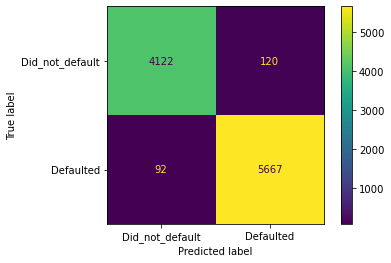

In [24]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
expected = y_test
predicted = classifier.predict(X_test)
accuracy=classifier.score(X_test, y_test)

print("Classification report for classifier %s:\n%s\n" % (
    classifier, classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % confusion_matrix(expected, predicted))
plot_confusion_matrix(classifier,X_test,
                      y_test,
                      values_format='d',
                      display_labels=["Did_not_default","Defaulted"])

print(int(accuracy*100),'%')


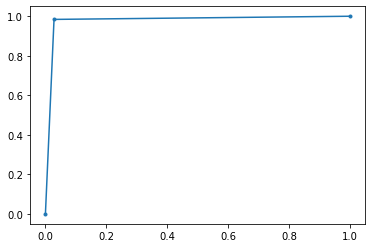

In [33]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
y_pred = classifier.predict(X_test)
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test  , y_pred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='support vecotr machine (auc = %0.3f)' % auc_keras)

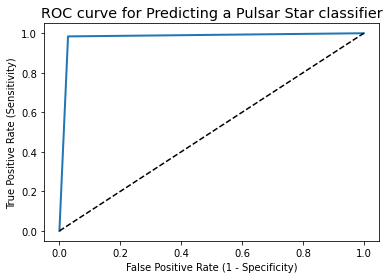

In [34]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y2)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()